# Tarea 1
Nombre: Nicolas Javier Carreño Perea
Cod: 2253404

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
data = pd.read_csv("../Datasets/data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [98]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [109]:
#Convertimos el tipo de dato a numerico binario
values_diagnosis = {"diagnosis": {'B':0,'M':1}} #Benign:0 Malign:1
data.replace(values_diagnosis, inplace=True)
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [110]:
#Borramos la columna unnamed
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [111]:
#Eliminamos la columna id ya que no aporta informacion relevante
data = data.drop(columns = ['id'])

In [112]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


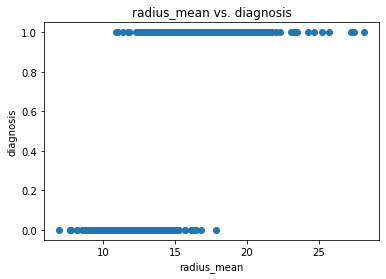

In [16]:
plt.scatter(x=data['radius_mean'],y=data['diagnosis'])
plt.title('radius_mean vs. diagnosis')
plt.xlabel('radius_mean')
plt.ylabel('diagnosis')
plt.show()

<AxesSubplot:>

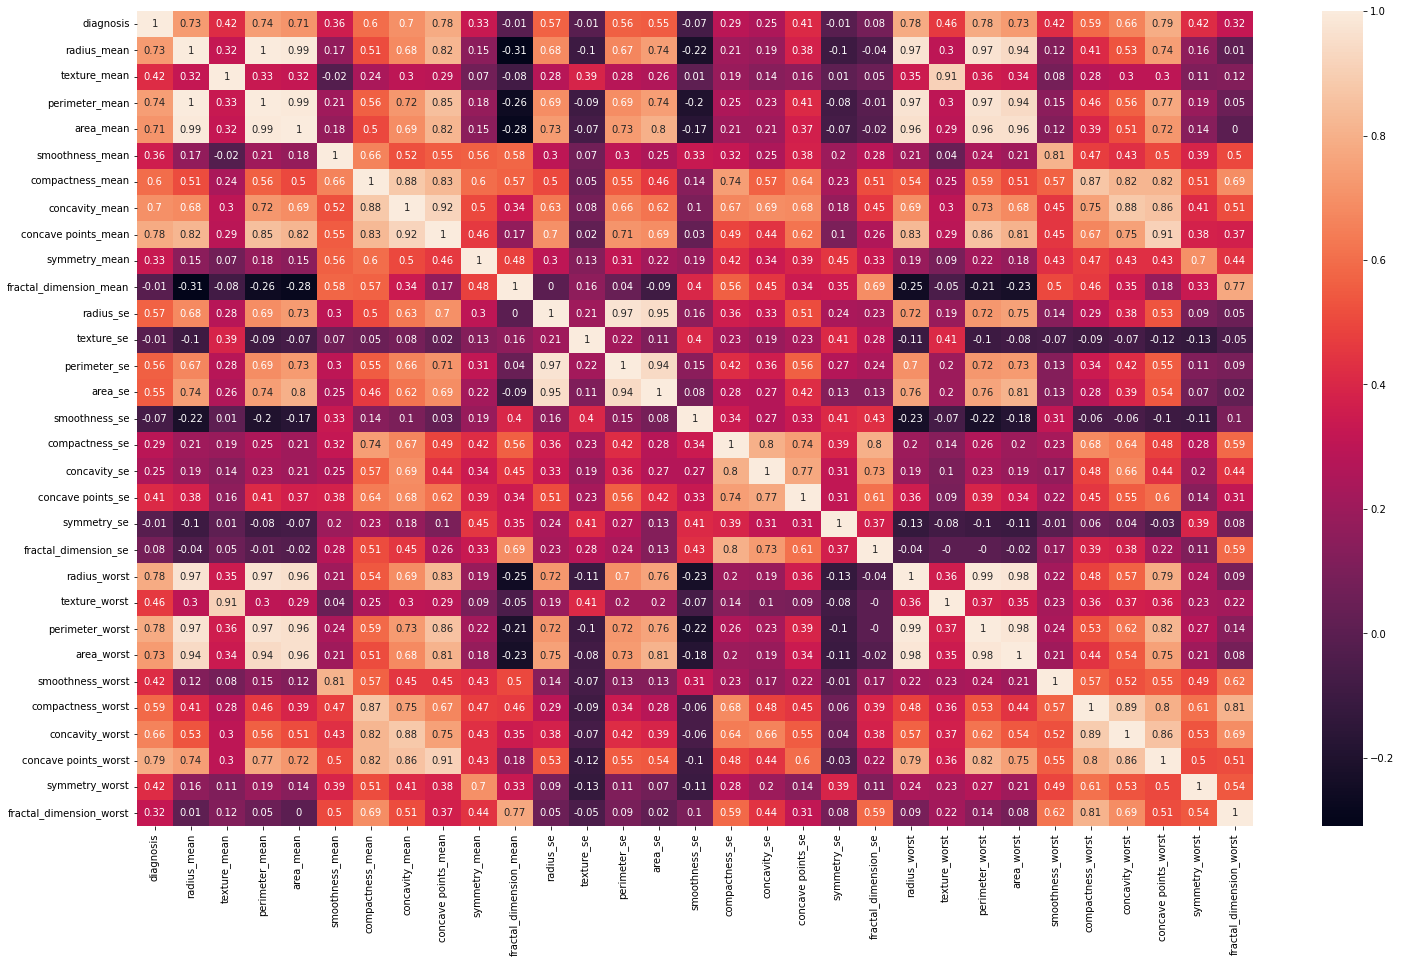

In [38]:
import seaborn as sns
plt.subplots(figsize=(25, 15))
#Función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

<AxesSubplot:>

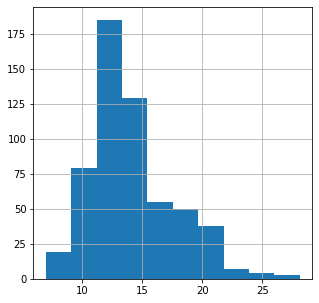

In [11]:
plt.subplots(figsize=(5, 5))
data['radius_mean'].hist()

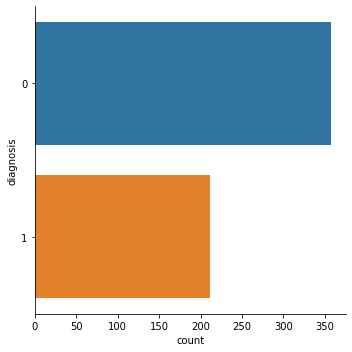

In [113]:
sns.catplot(y='diagnosis',data=data,kind='count')

## Entrenamiento: REGRESION LOGISTICA

In [129]:
x = data.drop(columns='diagnosis')
y = data['diagnosis']

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [131]:
x_test.shape

(114, 30)

In [132]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(solver='liblinear')
modelo.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [138]:
y_train_pred = modelo.predict(x_train)
y_test_pred = modelo.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print("----- LOGISTIC REGRESSION RESULTS -----")
print("Accuracy of train: %.3f" % accuracy_score(y_train_pred, y_train))
print("Accuracy of test: %.3f" % accuracy_score(y_test_pred, y_test))
print("Model Accuracy global score: %.3f" % modelo.score(x_test,y_test))

----- LOGISTIC REGRESSION RESULTS -----
Accuracy of train: 0.956
Accuracy of test: 0.974
Model Accuracy global score: 0.974


## Entrenamiento: ARBOLES DE DECISION

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
print("----- DECISION TREE RESULTS -----")
print("Accuracy of train: %.3f" % accuracy_score(y_train_pred, y_train))
print("Accuracy of test: %.3f" % accuracy_score(y_test_pred, y_test))
print("Model Accuracy global score: %.3f" % dtree.score(x_test,y_test))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.94      0.94      0.94        48

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  3]
 [ 3 45]]
----- DECISION TREE RESULTS -----
Accuracy of train: 1.000
Accuracy of test: 0.947
Model Accuracy global score: 0.947
